## **Desafío Latam:** Preprocesamiendo de `Datos` 

In [202]:
# Librerias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import warnings

warnings.filterwarnings("ignore")

### Pregunta **N°1**: 

Realiza un análisis de calidad de datos, revisando aspectos básicos y selecciona un primer conjunto de variables a eliminar. Luego de ello, realiza un análisis exploratorio inicial considerando gráficos de distribuciones de las diferentes variables, y concluye al respecto. Si observas algo raro respecto a los tipos de variables debes proponer
algún tratamiento.

### Pregunta **N°2**:

Transformación Inicial de Datos: Las diferentes columnas que son datos de texto deben ser transformadas a numéricas para poder explorarlas de mejor forma por ejemplo:
* **User Rating:** Extraer el número correspondiente al rating
* **Number of Votes:** Convertir en número
* **Year:** Extraer el año de inicio del anime
* **Otros.** Aplica algún criterio para saber qué variables deben ser transformadas
en primera instancia.

In [203]:
# Importamos dataset
df = pd.read_excel("imdb_anime.xlsx")
df.head()

,Title,Genre,User Rating,Number of Votes,Runtime,Year,Summary,Stars,Certificate,Metascore,Gross,Episode,Episode Title
0,One Piece,"Animation, Action, Adventure",8.9,187689,24 min,(1999– ),Follows the adventures of Monkey D. Luffy and ...,"Mayumi Tanaka,Laurent Vernin,Akemi Okamura,Ton...",TV-14,NaN,187689,0,NaN
1,Teenage Mutant Ninja Turtles: Mutant Mayhem,"Animation, Action, Adventure",7.4,28895,99 min,-2023,The film follows the Turtle brothers as they w...,NaN,PG,74,28895,0,NaN
2,The Super Mario Bros. Movie,"Animation, Adventure, Comedy",7.1,189108,92 min,-2023,A plumber named Mario travels through an under...,NaN,PG,46,189108,0,NaN
3,Attack on Titan,"Animation, Action, Adventure",9.1,434457,24 min,(2013–2023),After his hometown is destroyed and his mother...,"Josh Grelle,Bryce Papenbrook,Yûki Kaji,Yui Ish...",TV-MA,NaN,434457,0,NaN
4,Jujutsu Kaisen,"Animation, Action, Adventure",8.5,82909,24 min,(2020– ),A boy swallows a cursed talisman - the finger ...,"Junya Enoki,Yûichi Nakamura,Adam McArthur,Yuma...",TV-MA,NaN,82909,0,NaN


In [204]:
# Tipo de dato del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45717 entries, 0 to 45716
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Title            45717 non-null  object
 1   Genre            45717 non-null  object
 2   User Rating      25009 non-null  object
 3   Number of Votes  25009 non-null  object
 4   Runtime          32549 non-null  object
 5   Year             45591 non-null  object
 6   Summary          23547 non-null  object
 7   Stars            13676 non-null  object
 8   Certificate      28694 non-null  object
 9   Metascore        341 non-null    object
 10  Gross            25009 non-null  object
 11  Episode          45717 non-null  object
 12  Episode Title    34910 non-null  object
dtypes: object(13)
memory usage: 4.5+ MB


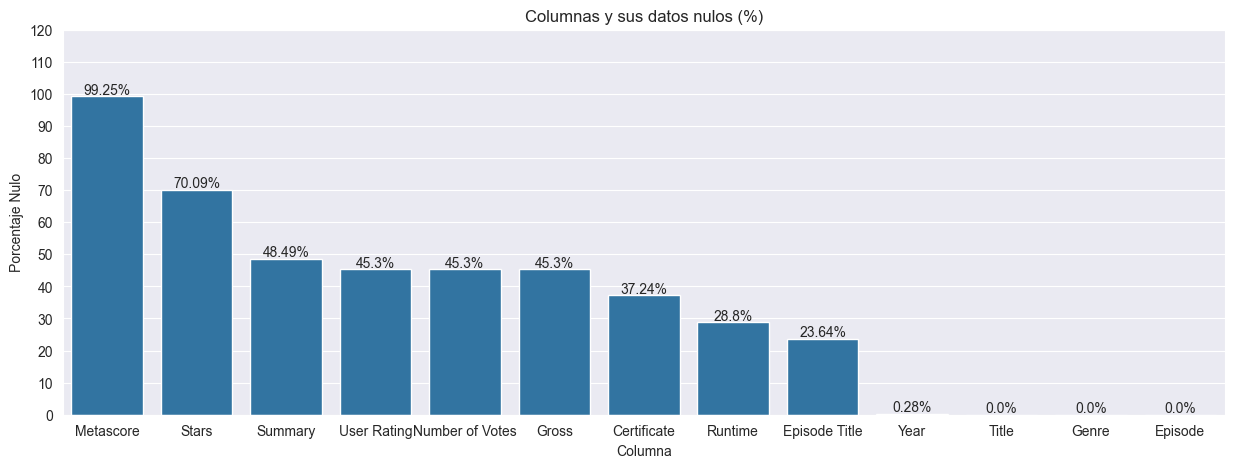

In [ ]:
# Verificación de nulos
no_nulos = {}

for col in df.columns:
    no_nulos[col] = round((df[col].isnull().sum()/len(df)) * 100,2)

df_nulls = pd.DataFrame(no_nulos.items(), columns=["Columna","Porcentaje Nulo"]).sort_values(by="Porcentaje Nulo",ascending=False)

plt.figure(figsize=(15,5))

sns.set_style("darkgrid")
grafico = sns.barplot(data=df_nulls, x="Columna", y="Porcentaje Nulo")

for index, value in enumerate(df_nulls['Porcentaje Nulo']):
    plt.text(index, value + 2, str(value) +"%", ha='center', va='center')

plt.title("Columnas y sus datos nulos (%)")
plt.yticks([i for i in range(0,130,10)])
plt.show()

In [208]:
df['User Rating'] = df['User Rating'].astype(float)
df.dtypes

ValueError: could not convert string to float: 'User Rating'

❌ Lo anterior `genera un error`, es probable que existan valores de tipo texto en la columna `User Rating` que surge al intentar pasar algo que es texto a numérico. Validaremos esto.

In [ ]:
df['User Rating'].value_counts().sort_values(ascending=True)

User Rating
User Rating       1
2.5               1
1.8               2
2.1               2
1.7               2
               ... 
7.7            1142
7.2            1144
7.4            1171
7.5            1174
7.6            1270
Name: count, Length: 87, dtype: int64

In [ ]:
df[df['User Rating'] == 'User Rating']

,Title,Genre,User Rating,Number of Votes,Runtime,Year,Summary,Stars,Certificate,Metascore,Gross,Episode,Episode Title
840,Title,Genre,User Rating,Number of Votes,Runtime,Year,Summary,Stars,Certificate,Metascore,Gross,Episode,Episode Title


In [ ]:
# Eliminaremos registro del dataset
df = df[df['User Rating'] != 'User Rating']

# Convertiremos a varibles numéricas
df['User Rating'] = df['User Rating'].astype(float)
df['Number of Votes'] = df['Number of Votes'].astype("Int64")
df['Runtime'] = df['Runtime'].str.replace(" min","").str.replace(",","").astype("Int64")

# Usamos regex para identificar los primeros 4 números consecutivos
df['Year'] = df['Year'].apply(lambda x: re.search(r'\d{4}', str(x)).group(0) if re.search(r'\d{4}', str(x)) else None)
df['Year'] = df['Year'].astype('Int64')

df['Metascore'] = df['Metascore'].astype('Int64')
df['Gross'] = df['Gross'].astype('Int64')
df['Episode'] = df['Episode'].astype("Int64")

df.dtypes

Title               object
Genre               object
User Rating        float64
Number of Votes      Int64
Runtime              Int64
Year                 Int64
Summary             object
Stars               object
Certificate         object
Metascore            Int64
Gross                Int64
Episode              Int64
Episode Title       object
dtype: object

In [209]:
df.head()

,Title,Genre,User Rating,Number of Votes,Runtime,Year,Summary,Stars,Certificate,Metascore,Gross,Episode,Episode Title
0,One Piece,"Animation, Action, Adventure",8.9,187689,24 min,(1999– ),Follows the adventures of Monkey D. Luffy and ...,"Mayumi Tanaka,Laurent Vernin,Akemi Okamura,Ton...",TV-14,NaN,187689,0,NaN
1,Teenage Mutant Ninja Turtles: Mutant Mayhem,"Animation, Action, Adventure",7.4,28895,99 min,-2023,The film follows the Turtle brothers as they w...,NaN,PG,74,28895,0,NaN
2,The Super Mario Bros. Movie,"Animation, Adventure, Comedy",7.1,189108,92 min,-2023,A plumber named Mario travels through an under...,NaN,PG,46,189108,0,NaN
3,Attack on Titan,"Animation, Action, Adventure",9.1,434457,24 min,(2013–2023),After his hometown is destroyed and his mother...,"Josh Grelle,Bryce Papenbrook,Yûki Kaji,Yui Ish...",TV-MA,NaN,434457,0,NaN
4,Jujutsu Kaisen,"Animation, Action, Adventure",8.5,82909,24 min,(2020– ),A boy swallows a cursed talisman - the finger ...,"Junya Enoki,Yûichi Nakamura,Adam McArthur,Yuma...",TV-MA,NaN,82909,0,NaN
